# Growth Charts and Relative Position Metrics Evaluation

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Using CNN output labels

In [ ]:
import os
import pandas as pd

# Define the path to your folder
folder_path = '/content/drive/MyDrive/BEng_Project2/NEW/running-pelvis-and-fetus-landmarks/Pelvimetry_results_ALL'  # ← Replace this with your actual path

# Initialize a list to hold all individual subject DataFrames
all_subject_dfs = []

# Loop through each file in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.csv') and filename.startswith('pelvimetry_'):
        subject_id = filename.replace('pelvimetry_', '').replace('.csv', '')

        # Load CSV into DataFrame
        df = pd.read_csv(os.path.join(folder_path, filename))

        # Pivot the DataFrame to make measurement names columns
        df_pivoted = df.pivot_table(index=None,
                                    columns='Measurements',
                                    values='UNet Predicted [mm]')  # or 'manual' if preferred

        # Add subject ID as the first column
        df_pivoted.insert(0, 'mibirth id', subject_id)

        # Append to the list
        all_subject_dfs.append(df_pivoted)

# Combine all subject DataFrames
final_pelvimetry_df = pd.concat(all_subject_dfs, ignore_index=True)


In [ ]:
final_pelvimetry_df

Measurements,mibirth id,Inlet AP diameter,Inlet transverse diameter,Interspines distance,Intertuburious distance,Mid pelvis circumference,Midpelvis AP diameter,Obstetric conjugate,Pelvic inlet circumference
0,mibirth003301,129.282131,121.463059,106.153079,103.430354,352.711133,118.389802,130.663352,393.869624
1,mibirth003501,135.913746,114.784575,102.027321,96.999732,358.974879,126.503184,137.479574,393.796002
2,mibirth003601,125.538868,137.740676,125.561901,114.271548,393.988630,125.259050,130.133570,413.558542
3,mibirth003801,124.794377,131.805801,118.160834,113.975317,382.249798,125.186946,126.543994,403.066617
4,mibirth003901,125.939335,127.435153,118.131024,102.164569,374.445556,120.248421,128.875812,397.999716
...,...,...,...,...,...,...,...,...,...
62,mibirth018701,127.778590,129.971433,133.127168,127.392466,388.415246,114.145657,128.008954,404.872789
63,mibirth018901,142.771016,140.763909,126.703025,115.522633,391.991022,122.846210,143.828083,445.375618
64,mibirth019001,135.320145,137.641093,125.781413,116.157257,398.089518,127.650245,139.808239,428.766510
65,mibirth019201,135.826803,138.492732,120.055603,111.729568,400.520792,134.923853,138.811360,430.900118


In [ ]:
import os
import pandas as pd

# Define the path to your folder
folder_path = '/content/drive/MyDrive/BEng_Project2/NEW/running-pelvis-and-fetus-landmarks/Fetal_biometry_results_ALL'  # ← Replace this with your actual path

# Initialize a list to hold all individual subject DataFrames
all_subject_dfs = []

# Loop through each file in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.csv') and filename.startswith('fetal_biometry_'):
        subject_id = filename.replace('fetal_biometry_', '').replace('.csv', '')

        # Load CSV into DataFrame
        df = pd.read_csv(os.path.join(folder_path, filename))

        # Pivot the DataFrame to make measurement names columns
        df_pivoted = df.pivot_table(index=None,
                                    columns='Measurements',
                                    values='UNet Predicted [mm]')  # or 'manual' if preferred

        # Add subject ID as the first column
        df_pivoted.insert(0, 'mibirth id', subject_id)

        # Append to the list
        all_subject_dfs.append(df_pivoted)

# Combine all subject DataFrames
final_biometry_df = pd.concat(all_subject_dfs, ignore_index=True)


In [ ]:
final_biometry_df

Measurements,mibirth id,BPD,Bihumeral diameter,Fetal head circumference (HC),Mento-vertical diameter,OFD
0,mibirth003301,91.958595,88.757731,314.411799,123.261521,108.202173
1,mibirth003501,87.652423,75.692215,306.628033,130.483381,107.553045
2,mibirth003601,87.913756,94.638916,297.012552,131.946302,101.170307
3,mibirth003801,83.897941,81.404317,289.525591,123.448884,100.419775
4,mibirth003901,95.247634,81.655374,321.875911,126.237874,109.664936
...,...,...,...,...,...,...
62,mibirth018701,NaN,100.684307,NaN,NaN,NaN
63,mibirth018901,94.251785,91.495402,325.089043,132.899883,112.706328
64,mibirth019001,89.621107,85.297199,306.692430,124.574097,105.625358
65,mibirth019201,92.170649,92.861231,314.378249,121.493674,107.968760


In [ ]:
import pandas as pd

# Load the Excel file into a DataFrame
ga_df = pd.read_excel('/content/drive/MyDrive/BEng_Project2/NEW/running-pelvis-and-fetus-landmarks/MiBirth-GAScanBirthAndDelive_DATA_LABELS_2025-04-09_1127.xlsx')  # ← Replace with actual path

# Ensure 'MiBirth ID' is treated as a string
ga_df['MiBirth ID'] = ga_df['MiBirth ID'].astype(str)

# Step 1: Create the new full patient ID by appending '01'
ga_df['mibirth id'] = ga_df['MiBirth ID'] + '01'

# Keep only the relevant columns
ga_df_reduced = ga_df[['mibirth id', 'GA for MRI Fetal (auto calculated)']] #GA at MRI (weeks)

# Merge with final_df based on 'MiBirth ID', keeping only those in final_df
merged_pelvimetry_df = final_pelvimetry_df.merge(ga_df_reduced, on='mibirth id', how='left')
merged_biometry_df = final_biometry_df.merge(ga_df_reduced, on='mibirth id', how='left')


# Drop the duplicate GA column from the second DataFrame
merged_pelvimetry_df_cleaned = merged_pelvimetry_df.drop(columns=['GA for MRI Fetal (auto calculated)'])

merged_full_biometry_df = merged_pelvimetry_df_cleaned.merge(merged_biometry_df, on='mibirth id', how='left')



In [ ]:
merged_pelvimetry_df

,mibirth id,Inlet AP diameter,Inlet transverse diameter,Interspines distance,Intertuburious distance,Mid pelvis circumference,Midpelvis AP diameter,Obstetric conjugate,Pelvic inlet circumference,GA for MRI Fetal (auto calculated)
0,mibirth003301,129.282131,121.463059,106.153079,103.430354,352.711133,118.389802,130.663352,393.869624,37.000000
1,mibirth003501,135.913746,114.784575,102.027321,96.999732,358.974879,126.503184,137.479574,393.796002,37.000000
2,mibirth003601,125.538868,137.740676,125.561901,114.271548,393.988630,125.259050,130.133570,413.558542,37.428571
3,mibirth003801,124.794377,131.805801,118.160834,113.975317,382.249798,125.186946,126.543994,403.066617,36.000000
4,mibirth003901,125.939335,127.435153,118.131024,102.164569,374.445556,120.248421,128.875812,397.999716,37.142857
...,...,...,...,...,...,...,...,...,...,...
65,mibirth018701,127.778590,129.971433,133.127168,127.392466,388.415246,114.145657,128.008954,404.872789,36.000000
66,mibirth018901,142.771016,140.763909,126.703025,115.522633,391.991022,122.846210,143.828083,445.375618,37.857143
67,mibirth019001,135.320145,137.641093,125.781413,116.157257,398.089518,127.650245,139.808239,428.766510,37.428571
68,mibirth019201,135.826803,138.492732,120.055603,111.729568,400.520792,134.923853,138.811360,430.900118,38.285714


In [ ]:
merged_full_biometry_df

,mibirth id,Inlet AP diameter,Inlet transverse diameter,Interspines distance,Intertuburious distance,Mid pelvis circumference,Midpelvis AP diameter,Obstetric conjugate,Pelvic inlet circumference,BPD,Bihumeral diameter,Fetal head circumference (HC),Mento-vertical diameter,OFD,GA for MRI Fetal (auto calculated)
0,mibirth003301,129.282131,121.463059,106.153079,103.430354,352.711133,118.389802,130.663352,393.869624,91.958595,88.757731,314.411799,123.261521,108.202173,37.000000
1,mibirth003501,135.913746,114.784575,102.027321,96.999732,358.974879,126.503184,137.479574,393.796002,87.652423,75.692215,306.628033,130.483381,107.553045,37.000000
2,mibirth003601,125.538868,137.740676,125.561901,114.271548,393.988630,125.259050,130.133570,413.558542,87.913756,94.638916,297.012552,131.946302,101.170307,37.428571
3,mibirth003801,124.794377,131.805801,118.160834,113.975317,382.249798,125.186946,126.543994,403.066617,83.897941,81.404317,289.525591,123.448884,100.419775,36.000000
4,mibirth003901,125.939335,127.435153,118.131024,102.164569,374.445556,120.248421,128.875812,397.999716,95.247634,81.655374,321.875911,126.237874,109.664936,37.142857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,mibirth018701,127.778590,129.971433,133.127168,127.392466,388.415246,114.145657,128.008954,404.872789,NaN,100.684307,NaN,NaN,NaN,36.000000
72,mibirth018901,142.771016,140.763909,126.703025,115.522633,391.991022,122.846210,143.828083,445.375618,94.251785,91.495402,325.089043,132.899883,112.706328,37.857143
73,mibirth019001,135.320145,137.641093,125.781413,116.157257,398.089518,127.650245,139.808239,428.766510,89.621107,85.297199,306.692430,124.574097,105.625358,37.428571
74,mibirth019201,135.826803,138.492732,120.055603,111.729568,400.520792,134.923853,138.811360,430.900118,92.170649,92.861231,314.378249,121.493674,107.968760,38.285714


### Growth Charts

In [ ]:
import math
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def plot_all_vs_ga(df):
    """
    Creates regression plots of each numeric column (excluding GA column)
    against 'GA for MRI Fetal (auto calculated)', arranged in subplots (3 per row).

    Parameters:
    df (pd.DataFrame): The DataFrame containing the data.
    """
    x_col = 'GA for MRI Fetal (auto calculated)'
    valid_cols = [col for col in df.columns if col != x_col and pd.api.types.is_numeric_dtype(df[col])]

    n_cols = 3
    n_rows = math.ceil(len(valid_cols) / n_cols)

    sns.set(style='whitegrid')
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(6 * n_cols, 5 * n_rows))
    axes = axes.flatten()  # Flatten in case of multiple rows

    for idx, col in enumerate(valid_cols):
        plot_df = df[[x_col, col]].dropna()
        ax = axes[idx]
        sns.regplot(
            x=x_col,
            y=col,
            data=plot_df,
            scatter_kws={'s': 40, 'alpha': 0.5, 'color': 'indigo'},
            line_kws={'color': 'red', 'linewidth': 2},
            ax=ax
        )
        ax.set_title(f'{col} vs. GA', fontsize=16, weight='bold')
        ax.set_xlabel('GA at MRI [weeks]',fontsize=14)
        ax.set_ylabel(f'{col} [mm]',fontsize=14)

    # Turn off any unused subplots
    for j in range(len(valid_cols), len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()


Growth Charts for the Pelvis Biometry

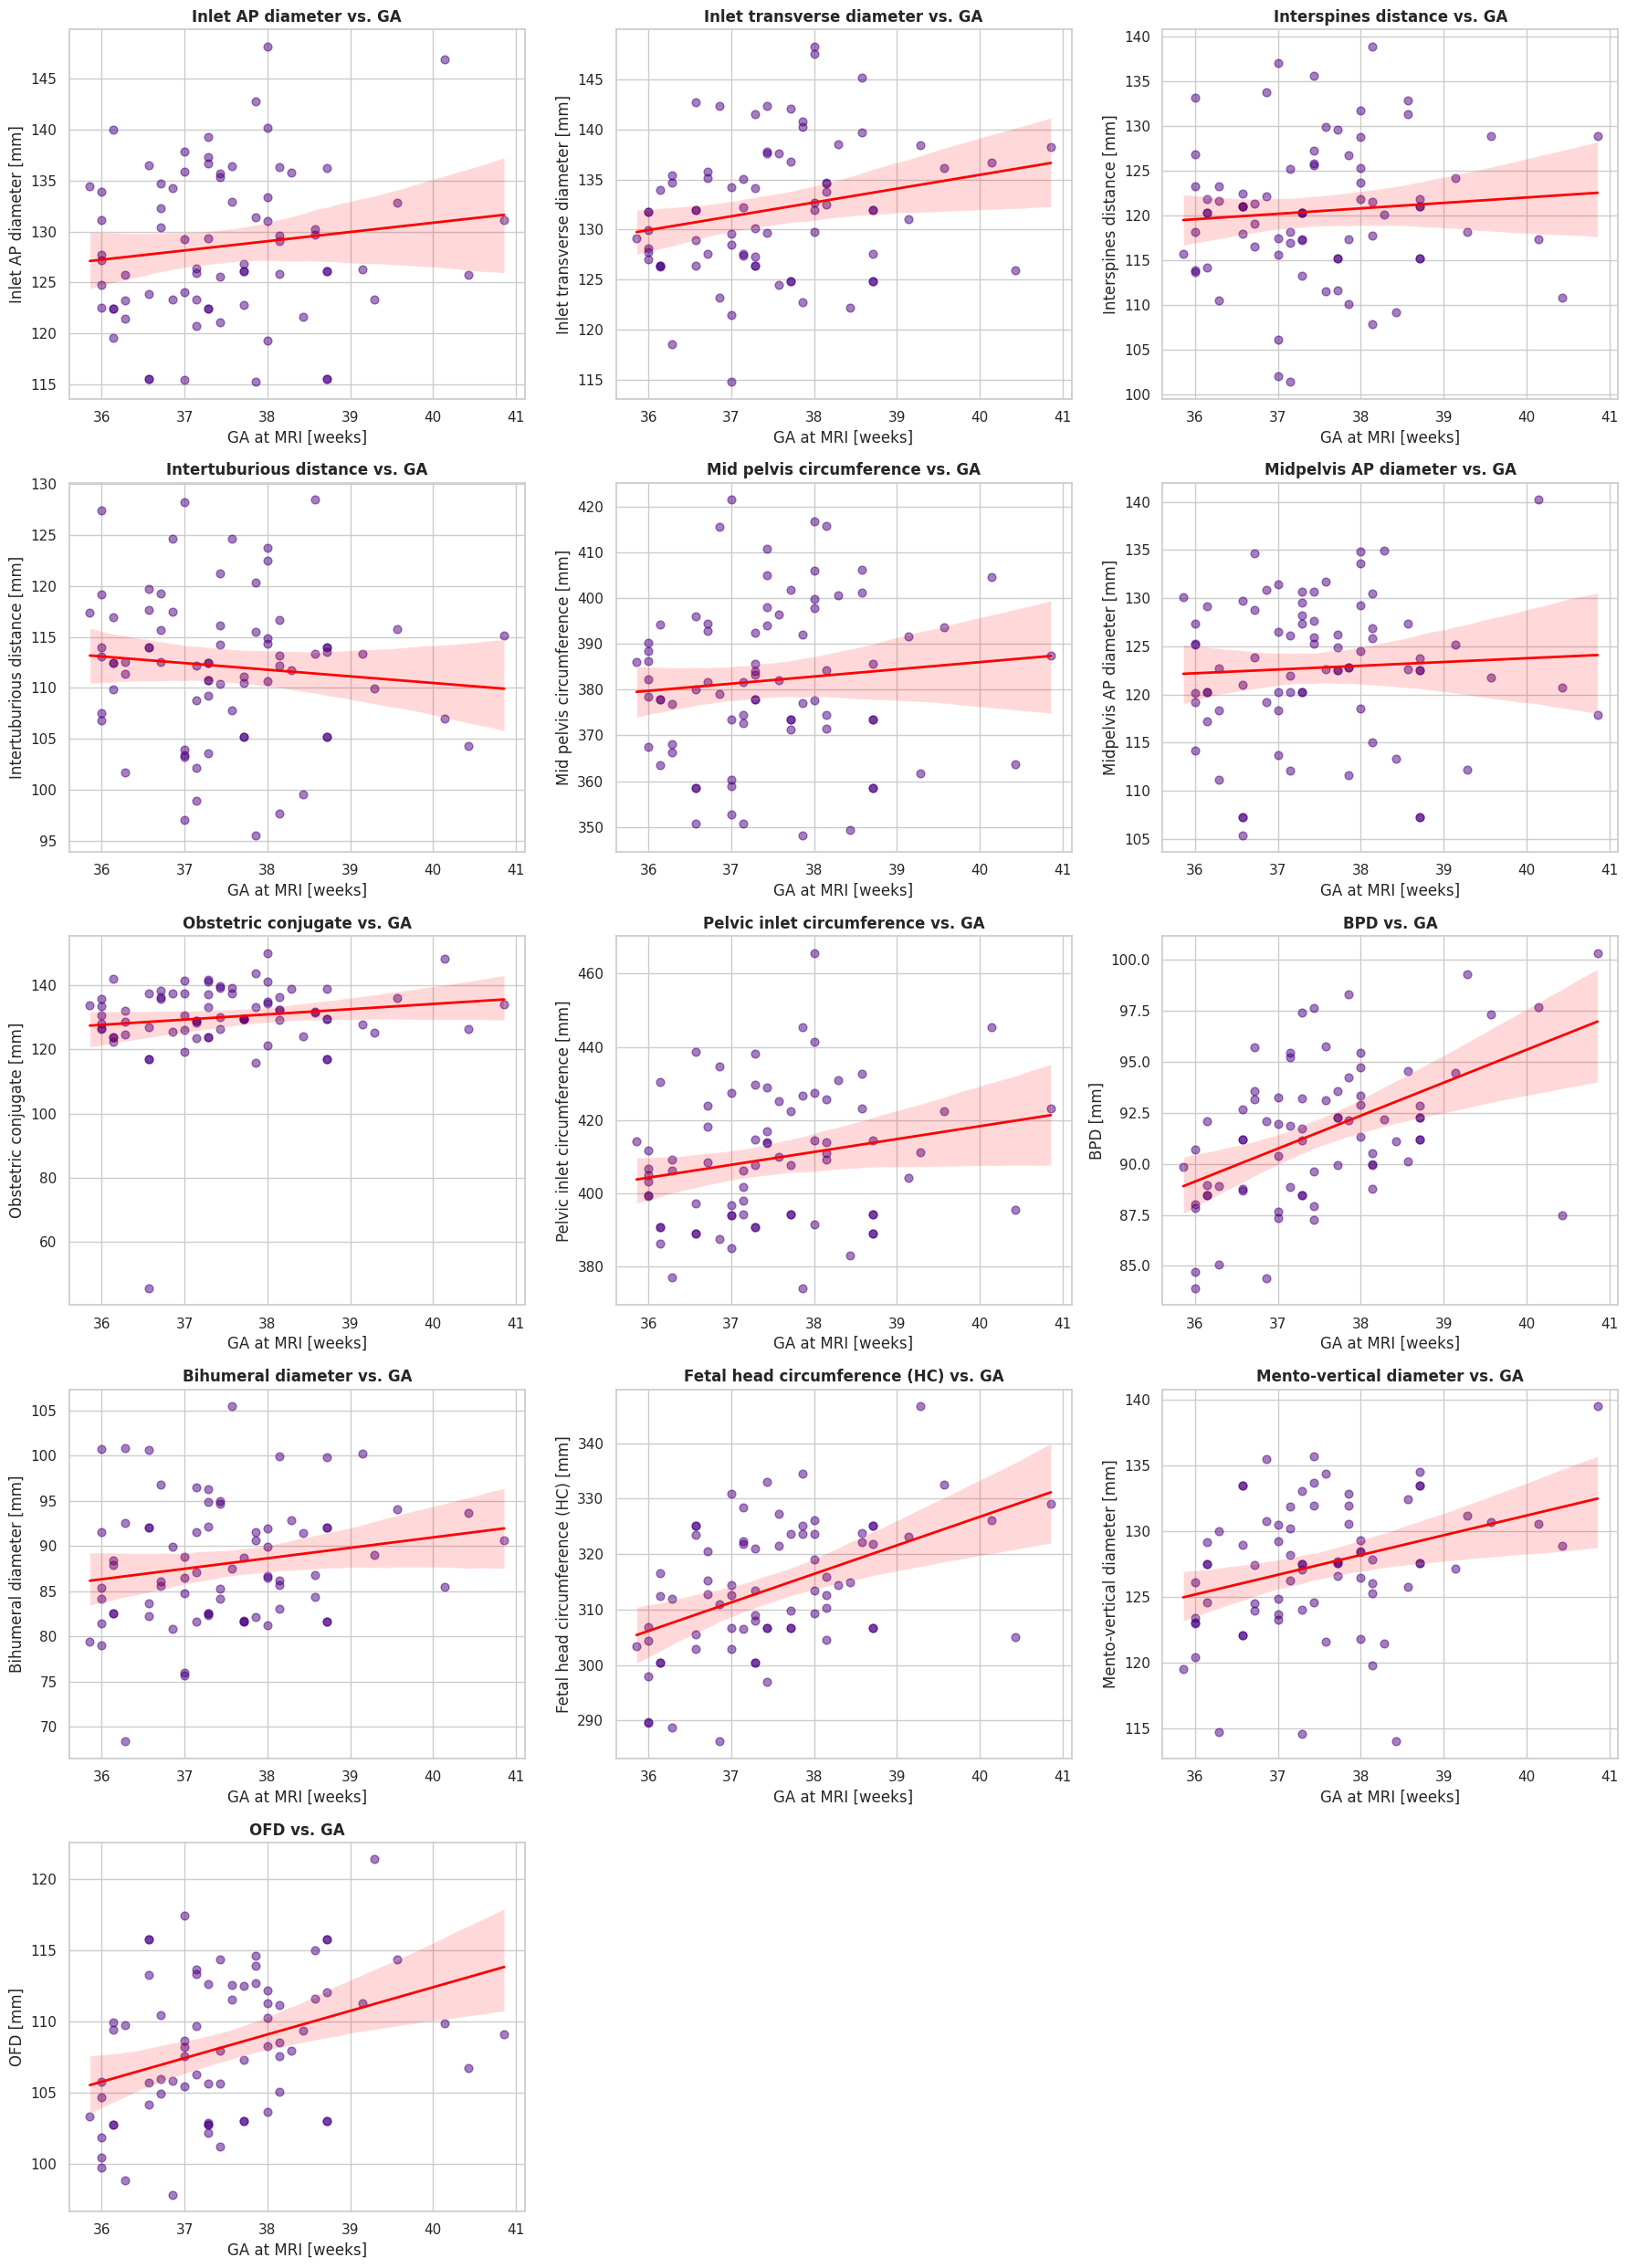

In [ ]:
plot_all_vs_ga(merged_full_biometry_df)

Growth Charts for the Fetal Biometry

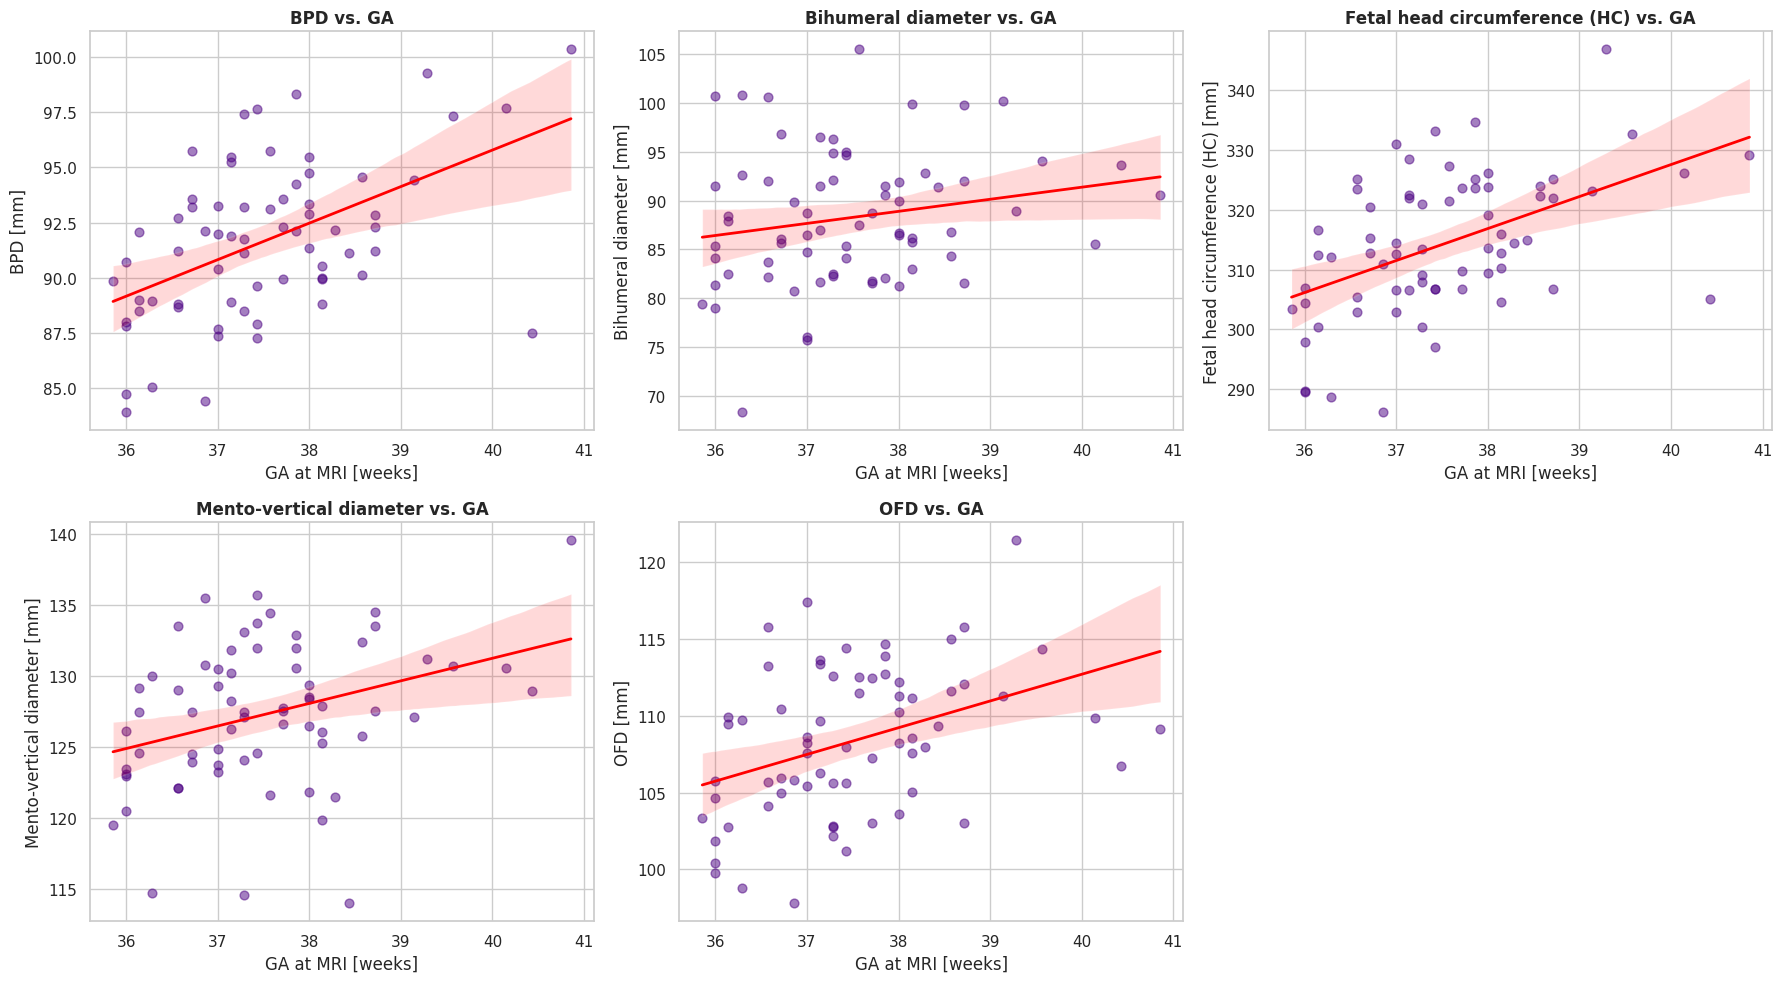

In [ ]:
plot_all_vs_ga(merged_biometry_df)

### Relative Position Analysis

In [ ]:
import pandas as pd
import os
from glob import glob

def load_and_concatenate_summary_csvs(folder_path):

    # Find all CSV files
    csv_files = glob(os.path.join(folder_path, "*.csv"))

    if not csv_files:
        print("No CSV files found in the folder.")
        return None

    # Load and concatenate
    dfs = []
    for file in csv_files:
        df = pd.read_csv(file)
        dfs.append(df)

    concatenated_df = pd.concat(dfs, ignore_index=True)

    # Sort by the 'Subject' column
    if "Subject" in concatenated_df.columns:
        concatenated_df = concatenated_df.sort_values(by="Subject").reset_index(drop=True)
    else:
        print("Warning: 'Subject' column not found. Returning unsorted DataFrame.")

    return concatenated_df

In [ ]:
merged_relativepos_df = load_and_concatenate_summary_csvs("/content/drive/MyDrive/BEng_Project2/NEW/running-pelvis-and-fetus-landmarks/Relative_measurements_results_ALL")
merged_relativepos_df

,Subject,Head Engagement (mm),Estimated Station,HC/OC Ratio,Magnin Index (mm),HC-IC (mm),HC-MC (mm),FPI
0,mibirth003301,20.21,-2.0,2.406,236.82,-79.46,-38.30,-117.76
1,mibirth003501,34.24,-3.0,2.230,239.51,-87.17,-52.35,-139.51
2,mibirth003601,7.78,0.0,2.282,255.70,-116.55,-96.98,-213.52
3,mibirth003801,19.29,-1.0,2.288,244.70,-113.54,-92.72,-206.27
4,mibirth003901,42.88,-4.0,2.498,247.01,-76.12,-52.57,-128.69
...,...,...,...,...,...,...,...,...
62,mibirth018701,32.90,-3.0,NaN,261.14,NaN,NaN,NaN
63,mibirth018901,32.69,-3.0,2.260,270.53,-120.29,-66.90,-187.19
64,mibirth019001,15.01,-1.0,2.194,265.59,-122.07,-91.40,-213.47
65,mibirth019201,28.90,-2.0,2.265,258.87,-116.52,-86.14,-202.66


In [ ]:
import pandas as pd

# Assuming your DataFrame is named `df_metrics`
columns_of_interest = ['HC/OC Ratio', 'Magnin Index (mm)', 'FPI']
corr_matrix = merged_relativepos_df[columns_of_interest].corr(method='pearson')

print("Correlation Matrix:")
print(corr_matrix)


Correlation Matrix:
                   HC/OC Ratio  Magnin Index (mm)       FPI
HC/OC Ratio           1.000000          -0.764343  0.837427
Magnin Index (mm)    -0.764343           1.000000 -0.744404
FPI                   0.837427          -0.744404  1.000000


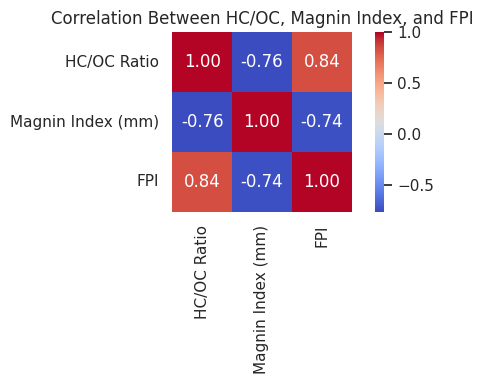

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Correlation Between HC/OC, Magnin Index, and FPI")
plt.tight_layout()
plt.show()


In [ ]:
import plotly.figure_factory as ff

def plot_correlation_heatmap_plotly(corr_matrix):
    # Round values for display
    z_text = corr_matrix.round(2).astype(str).values

    fig = ff.create_annotated_heatmap(
        z=corr_matrix.values,
        x=corr_matrix.columns.tolist(),
        y=corr_matrix.index.tolist(),
        annotation_text=z_text,
        colorscale="Spectral",
        zmin=-1,
        zmax=1,
        showscale=True,
        colorbar=dict(title="Correlation"),
        reversescale=False
    )

    # Move x-axis labels to the bottom
    fig.update_layout(
        title="Correlation Between HC/OC, Magnin Index, and FPI",
        xaxis=dict(side="bottom"),
        width=500,
        height=400,
        margin=dict(l=40, r=40, t=60, b=60)
    )

    fig.show()


In [ ]:
plot_correlation_heatmap_plotly(corr_matrix)

In [ ]:
merged_relativepos_df.tail(4)

,Subject,Head Engagement (mm),Estimated Station,HC/OC Ratio,Magnin Index (mm),HC-IC (mm),HC-MC (mm),FPI
63,mibirth018901,32.69,-3.0,2.260,270.53,-120.29,-66.90,-187.19
64,mibirth019001,15.01,-1.0,2.194,265.59,-122.07,-91.40,-213.47
65,mibirth019201,28.90,-2.0,2.265,258.87,-116.52,-86.14,-202.66
66,mibirth019301,22.06,-2.0,NaN,253.61,NaN,NaN,NaN


In [ ]:
import pandas as pd

# Load your merged_relativepos_df (replace this with your actual file path if needed)
# merged_relativepos_df = pd.read_csv("path_to_your_csv.csv")

# If the DataFrame is already in memory:
df = merged_relativepos_df.copy()

# Compute descriptive statistics
summary_stats = df.describe().T[["mean", "std", "min", "max"]]

# Add median and IQR
summary_stats["median"] = df.median(numeric_only=True)
summary_stats["IQR"] = df.quantile(0.75, numeric_only=True) - df.quantile(0.25, numeric_only=True)

# To save as CSV:
# summary_stats.to_csv("relative_position_summary.csv")


In [ ]:
summary_stats

,mean,std,min,max,median,IQR
Head Engagement (mm),22.740303,14.803953,-32.970,54.820,22.285,14.4750
Estimated Station,-1.863636,1.402046,-5.000,3.000,-2.000,2.0000
HC/OC Ratio,2.448969,0.551731,2.156,6.669,2.363,0.1770
Magnin Index (mm),251.640896,16.143808,163.390,281.830,251.830,17.8500
HC-IC (mm),-97.515469,18.772473,-142.050,-39.330,-99.545,24.0825
HC-MC (mm),-69.361846,20.237807,-108.890,-13.670,-72.490,21.0700
FPI,-167.211406,37.165512,-235.100,-53.010,-172.165,43.5200


In [ ]:
summary_stats = summary_stats.drop("Estimated Station")
summary_stats

,mean,std,min,max,median,IQR
Head Engagement (mm),22.740303,14.803953,-32.970,54.820,22.285,14.4750
HC/OC Ratio,2.448969,0.551731,2.156,6.669,2.363,0.1770
Magnin Index (mm),251.640896,16.143808,163.390,281.830,251.830,17.8500
HC-IC (mm),-97.515469,18.772473,-142.050,-39.330,-99.545,24.0825
HC-MC (mm),-69.361846,20.237807,-108.890,-13.670,-72.490,21.0700
FPI,-167.211406,37.165512,-235.100,-53.010,-172.165,43.5200


<ipython-input-28-7e794a2b6797>:19: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




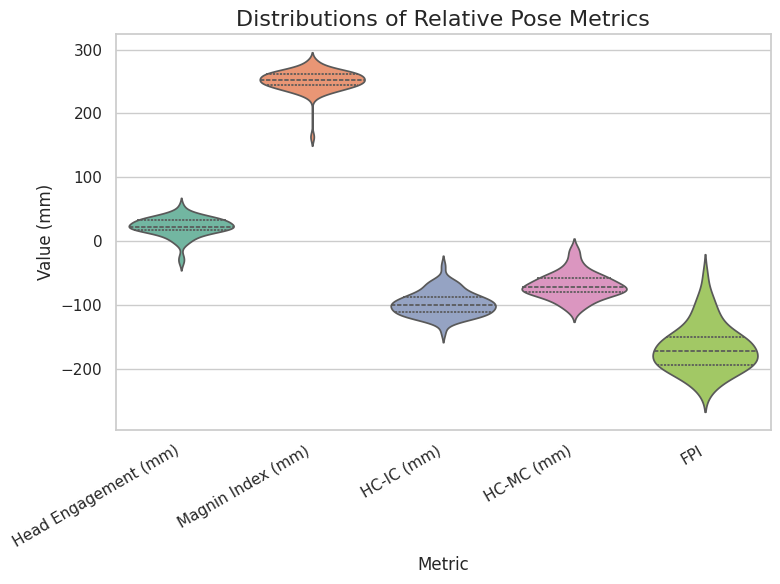

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Select only the numeric metric columns (excluding Subject)
metrics_to_plot = [
    "Head Engagement (mm)",
    "Magnin Index (mm)",
    "HC-IC (mm)",
    "HC-MC (mm)",
    "FPI"
]

# Melt the DataFrame to long format
df_melted = merged_relativepos_df[metrics_to_plot].melt(var_name="Metric", value_name="Value")

# Plot
plt.figure(figsize=(8, 6))
sns.violinplot(x="Metric", y="Value", data=df_melted, inner="quartile", palette="Set2")
plt.xticks(rotation=30, ha="right")
plt.ylabel("Value (mm)")
plt.title("Distributions of Relative Pose Metrics",fontsize=16)
plt.tight_layout()
plt.show()


## Using the Ground Truth label data

In [ ]:
import os
import pandas as pd

# Define the path to your folder
folder_path = '/content/drive/MyDrive/BEng_Project2/NEW/running-pelvis-and-fetus-landmarks/Pelvimetry_results_ALL_new'  # ← Replace this with your actual path

# Initialize a list to hold all individual subject DataFrames
all_subject_dfs = []

# Loop through each file in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.csv') and filename.startswith('pelvimetry_'):
        subject_id = filename.replace('pelvimetry_', '').replace('.csv', '')

        # Load CSV into DataFrame
        df = pd.read_csv(os.path.join(folder_path, filename))

        # Pivot the DataFrame to make measurement names columns
        df_pivoted = df.pivot_table(index=None,
                                    columns='Measurements',
                                    values='UNet Predicted [mm]')  # or 'manual' if preferred

        # Add subject ID as the first column
        df_pivoted.insert(0, 'mibirth id', subject_id)

        # Append to the list
        all_subject_dfs.append(df_pivoted)

# Combine all subject DataFrames
final_pelvimetry_df = pd.concat(all_subject_dfs, ignore_index=True)

In [ ]:
final_pelvimetry_df

Measurements,mibirth id,Inlet AP diameter,Inlet transverse diameter,Interspines distance,Intertuburious distance,Mid pelvis circumference,Midpelvis AP diameter,Obstetric conjugate,Pelvic inlet circumference
0,mibirth003301,129.369517,121.593258,106.129872,103.627827,352.883610,118.522811,131.073082,394.211405
1,mibirth003501,135.769780,114.945699,102.000466,96.939012,358.968974,126.526280,137.536698,393.822953
2,mibirth003601,125.689363,137.792358,125.627273,114.191106,393.805542,125.077122,130.177694,413.876119
3,mibirth003801,124.722559,131.814524,118.381592,113.530444,382.402199,125.063209,126.368286,402.967509
4,mibirth003901,126.247797,127.388004,117.988586,102.442335,374.200588,120.234907,129.045800,398.410185
...,...,...,...,...,...,...,...,...,...
62,mibirth018701,128.760349,130.078478,140.091275,116.089285,402.685375,116.266197,129.423469,406.583078
63,mibirth018901,143.524779,141.166236,127.870278,113.839423,392.088829,121.741223,144.511265,447.191601
64,mibirth019001,129.467898,135.689233,126.654100,117.968478,398.488159,127.031341,133.181742,416.507848
65,mibirth019201,133.249179,135.197409,117.008365,115.741120,392.080729,132.597979,136.959442,421.674913


In [ ]:
import os
import pandas as pd

# Define the path to your folder
folder_path = '/content/drive/MyDrive/BEng_Project2/NEW/running-pelvis-and-fetus-landmarks/Fetal_biometry_results_ALL_new'  # ← Replace this with your actual path

# Initialize a list to hold all individual subject DataFrames
all_subject_dfs = []

# Loop through each file in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.csv') and filename.startswith('fetal_biometry_'):
        subject_id = filename.replace('fetal_biometry_', '').replace('.csv', '')

        # Load CSV into DataFrame
        df = pd.read_csv(os.path.join(folder_path, filename))

        # Pivot the DataFrame to make measurement names columns
        df_pivoted = df.pivot_table(index=None,
                                    columns='Measurements',
                                    values='UNet Predicted [mm]')  # or 'manual' if preferred

        # Add subject ID as the first column
        df_pivoted.insert(0, 'mibirth id', subject_id)

        # Append to the list
        all_subject_dfs.append(df_pivoted)

# Combine all subject DataFrames
final_biometry_df = pd.concat(all_subject_dfs, ignore_index=True)


In [ ]:
final_biometry_df

Measurements,mibirth id,BPD,Bihumeral diameter,Fetal head circumference (HC),Mento-vertical diameter,OFD
0,mibirth003301,92.035188,88.530676,314.895194,123.495015,108.433319
1,mibirth003501,87.534784,75.980594,306.519490,130.563665,107.601584
2,mibirth003601,87.830230,93.991905,296.591386,131.977626,100.985711
3,mibirth003801,84.055879,81.877637,290.063665,123.661092,100.604386
4,mibirth003901,94.868502,81.919700,321.136333,126.073799,109.573237
...,...,...,...,...,...,...
62,mibirth018701,90.386461,99.900791,304.969450,121.650570,103.763121
63,mibirth018901,96.044719,93.020866,327.004372,138.038184,112.132730
64,mibirth019001,91.577852,82.989354,309.116493,126.436798,105.211820
65,mibirth019201,95.585056,92.951056,326.663671,122.720327,112.375496


In [ ]:
import pandas as pd

# Load the Excel file into a DataFrame
ga_df = pd.read_excel('/content/drive/MyDrive/BEng_Project2/NEW/running-pelvis-and-fetus-landmarks/MiBirth-GAScanBirthAndDelive_DATA_LABELS_2025-04-09_1127.xlsx')  # ← Replace with actual path

# Ensure 'MiBirth ID' is treated as a string
ga_df['MiBirth ID'] = ga_df['MiBirth ID'].astype(str)

# Step 1: Create the new full patient ID by appending '01'
ga_df['mibirth id'] = ga_df['MiBirth ID'] + '01'

# Keep only the relevant columns
ga_df_reduced = ga_df[['mibirth id', 'GA for MRI Fetal (auto calculated)']] #GA at MRI (weeks)

# Merge with final_df based on 'MiBirth ID', keeping only those in final_df
merged_pelvimetry_df = final_pelvimetry_df.merge(ga_df_reduced, on='mibirth id', how='left')
merged_biometry_df = final_biometry_df.merge(ga_df_reduced, on='mibirth id', how='left')

# Drop the duplicate GA column from the second DataFrame
merged_pelvimetry_df_cleaned = merged_pelvimetry_df.drop(columns=['GA for MRI Fetal (auto calculated)'])

merged_full_biometry_df = merged_pelvimetry_df_cleaned.merge(merged_biometry_df, on='mibirth id', how='left')



In [ ]:
merged_pelvimetry_df

,mibirth id,Inlet AP diameter,Inlet transverse diameter,Interspines distance,Intertuburious distance,Mid pelvis circumference,Midpelvis AP diameter,Obstetric conjugate,Pelvic inlet circumference,GA for MRI Fetal (auto calculated)
0,mibirth003301,129.369517,121.593258,106.129872,103.627827,352.883610,118.522811,131.073082,394.211405,37.000000
1,mibirth003501,135.769780,114.945699,102.000466,96.939012,358.968974,126.526280,137.536698,393.822953,37.000000
2,mibirth003601,125.689363,137.792358,125.627273,114.191106,393.805542,125.077122,130.177694,413.876119,37.428571
3,mibirth003801,124.722559,131.814524,118.381592,113.530444,382.402199,125.063209,126.368286,402.967509,36.000000
4,mibirth003901,126.247797,127.388004,117.988586,102.442335,374.200588,120.234907,129.045800,398.410185,37.142857
...,...,...,...,...,...,...,...,...,...,...
65,mibirth018701,128.760349,130.078478,140.091275,116.089285,402.685375,116.266197,129.423469,406.583078,36.000000
66,mibirth018901,143.524779,141.166236,127.870278,113.839423,392.088829,121.741223,144.511265,447.191601,37.857143
67,mibirth019001,129.467898,135.689233,126.654100,117.968478,398.488159,127.031341,133.181742,416.507848,37.428571
68,mibirth019201,133.249179,135.197409,117.008365,115.741120,392.080729,132.597979,136.959442,421.674913,38.285714


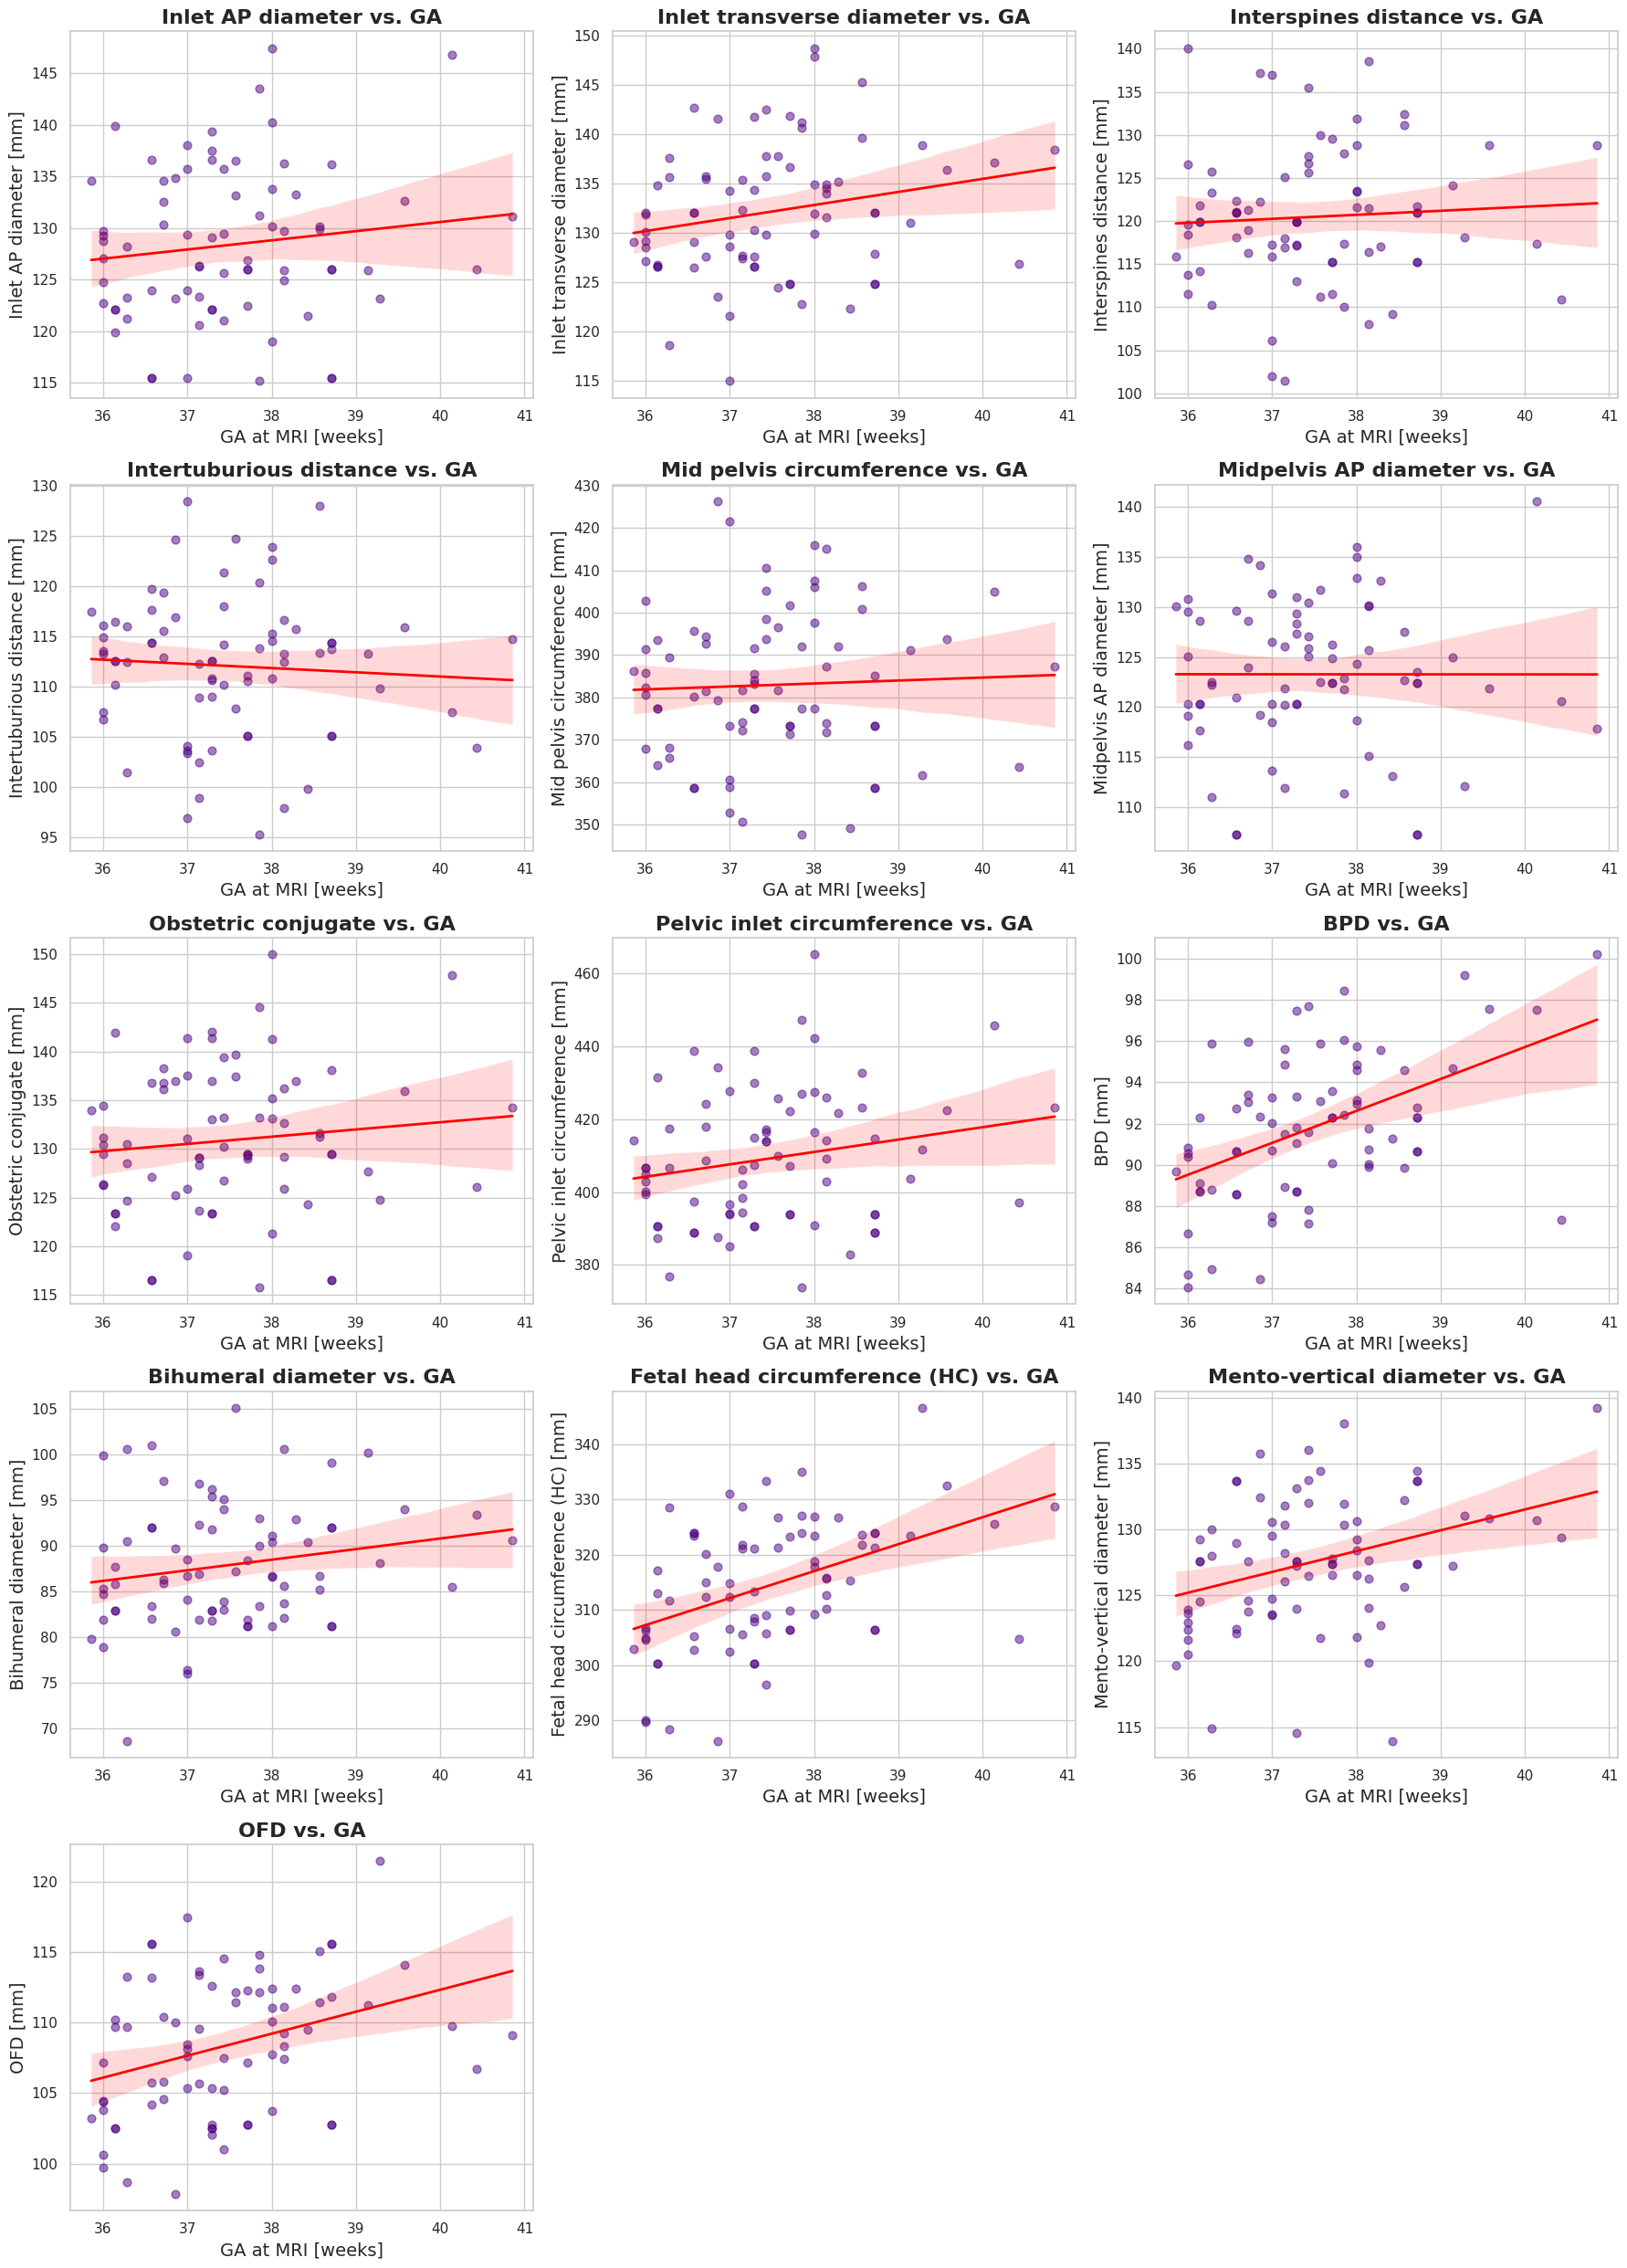

In [ ]:
plot_all_vs_ga(merged_full_biometry_df)

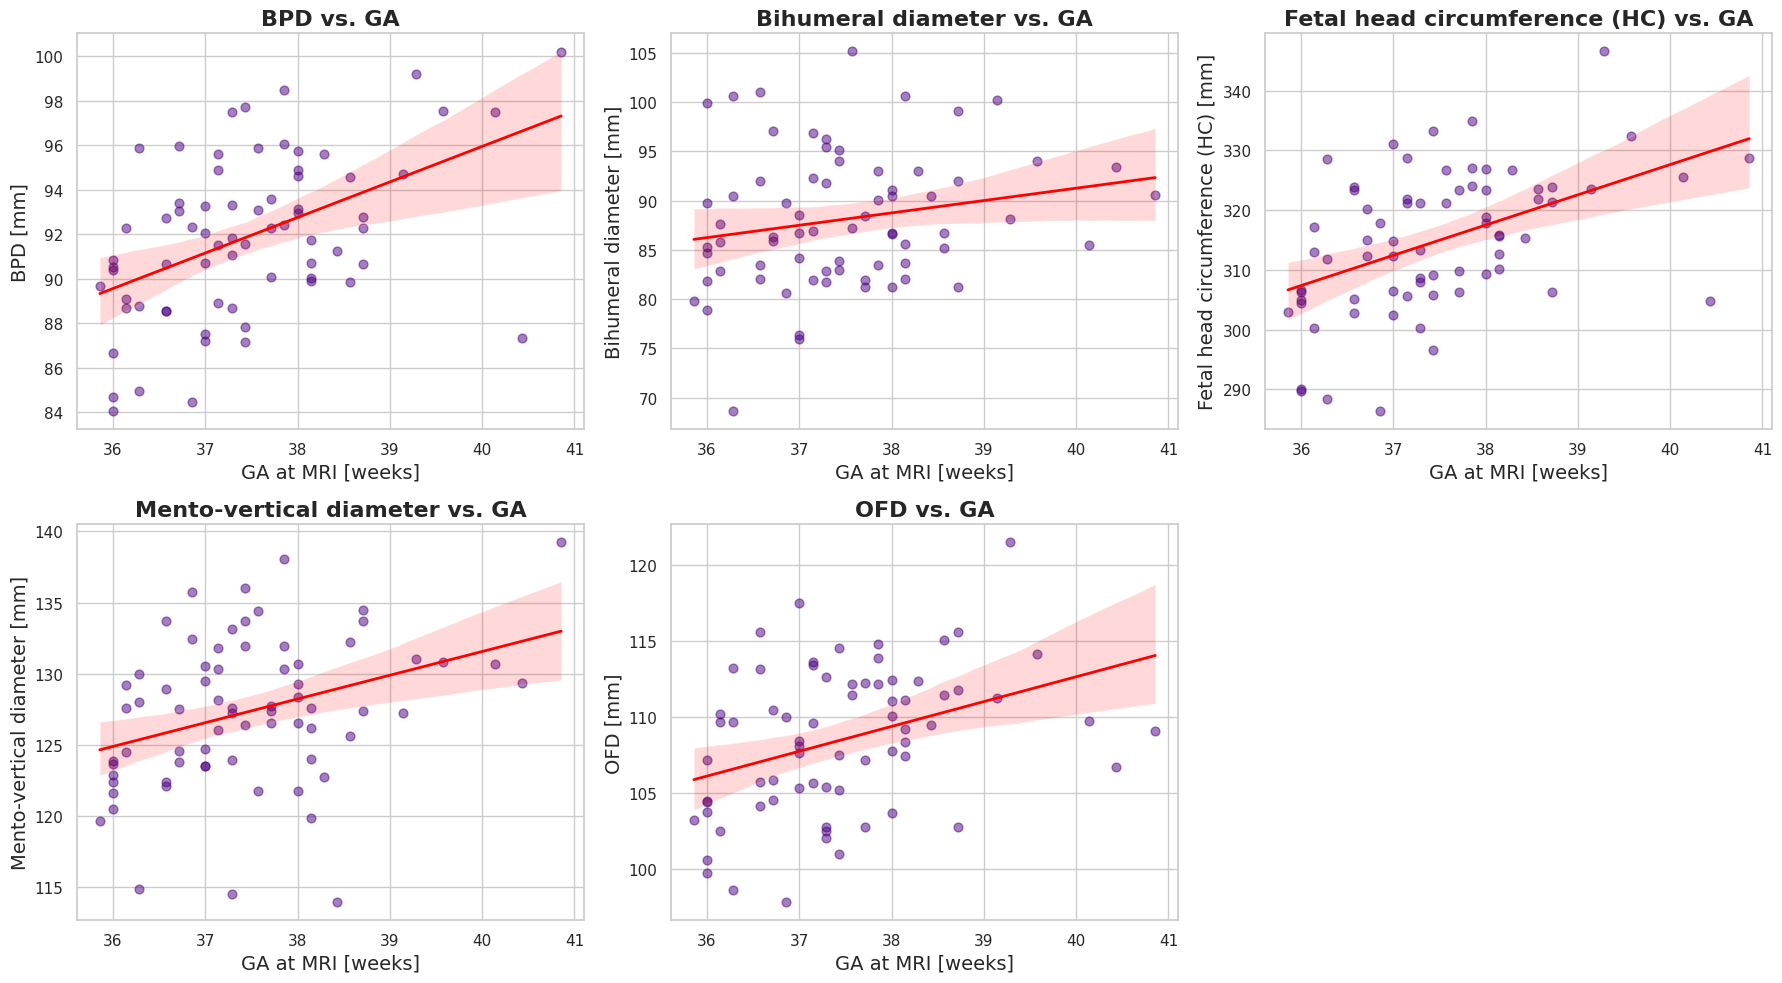

In [ ]:
plot_all_vs_ga(merged_biometry_df)

In [ ]:
import pandas as pd

# Merge pelvimetry and biometry dataframes on 'mibirth id'
merged_all_df = pd.merge(
    merged_pelvimetry_df[['mibirth id', 'Pelvic inlet circumference', 'Mid pelvis circumference', 'GA at MRI (weeks)']],
    merged_biometry_df[['mibirth id', 'Fetal head circumference (HC)']],
    on='mibirth id',
    how='inner'
)

# Group by GA and compute mean values
summary_df = merged_all_df.groupby('GA at MRI (weeks)', as_index=False).agg({
    'Pelvic inlet circumference': 'mean',
    'Mid pelvis circumference': 'mean',
    'Fetal head circumference (HC)': 'mean'
})

# Rename columns for clarity (optional)
summary_df.columns = ['GA at MRI (weeks)', 'Mean Pelvic Inlet Circumf.', 'Mean Mid Pelvis Circumf.', 'Mean Fetal Head Circumf.']


In [ ]:
summary_df

,GA at MRI (weeks),Mean Pelvic Inlet Circumf.,Mean Mid Pelvis Circumf.,Mean Fetal Head Circumf.
0,35,414.227280,386.285553,303.016705
1,36,404.884198,382.416972,308.389215
2,37,408.304810,380.998083,315.034063
3,38,413.053928,386.101306,317.784454
4,39,412.579626,382.162111,334.185983
5,40,422.090888,385.348001,319.702683
